<img src="https://raw.githubusercontent.com/FUlyankin/r_probability/master/end_seminars/sem_4/M_MPlain_grande.png" height="300" width="300"> 


# <center> R для тервера и матстата. <br>  <br> Домашка номер три! </center>

Данный ноутбук является домашкой по курсу «R для теории вероятностей и математической статистики» (РАНХиГС, 2019). Автор ноутбука - [вот этот парень по имени Филипп.](https://vk.com/ppilif) Если у вас для него есть деньги, слава или женщины, он от этого всего не откажется. Ноутбук распространяется на условиях лицензии [Creative Commons Attribution-Share Alike 4.0.](https://creativecommons.org/licenses/by-sa/4.0/) При использовании обязательно упоминание автора курса и аффилиации. При наличии технической возможности необходимо также указать активную гиперссылку на [страницу курса.](https://fulyankin.github.io/R_probability/) На ней можно найти другие материалы. Фрагменты кода, включенные в этот notebook, публикуются как [общественное достояние.](https://creativecommons.org/publicdomain/zero/1.0/)

----------------------

Приветствую вас внутри третьей домашки. __Краткий брифинг:__ 


* __Дедлайн: 10.07.19__
* Эта домашка про метод максимального правдоподобия
* Она построена как последовательность из небольших рисёрчей
* Довольно часто вам придётся выводить что-нибудь руками. В основном, выписывать правдоподобие и что-нибудь делать с ним. После нужно будет вбивать его в виде функции и оптимизировать. __Все ваши ручные вычисления должны быть приложены к решению.__ 
* __WARNING:__ решений прошлого года для этой домашки нет. Она свежая. 

---------------------------

* __Как оформлять домашки:__ 
    1. Компьютерные домашки оформляем либо в связке R + LaTeX, либо в юпитерских тетрадках (если хочется новых технологий), либо в связке R + Markdown. Все шаблоны для этого есть в репозитории. Пожалуйста, не нужно присылать мне просто тупой код с выводами в виде комментариев, написанных через решёточки. Я от этого могу сойти с ума. 
    2. Ручные решение можно оформлять двумя способами: либо вбивать их в файл вместе с кодом. Благо в Markdown, юпитере и других местах поддерживаются теховские формулу. Либо аккуратно оформляйте их на бумаге и присылайте свёрстанную pdf-ку. Не надо кидать мне фотки по одной. Я от этого тоже сойду с ума. Вариант с вбиванием в основной файл - предпочтительнее. Заодно попрактикуетесь в формулах для LaTeX. 
    
* На странице курса висит [видео-инструкция по оформлению.](https://yadi.sk/i/Pxp_pByP6Em9-A)

---------------------------

Ближе к делу. С чего начинается любой скрипт? Правильно! С подгрузки пакетов :) 

In [2]:
library('maxLik') # пакет для метода макс. правдоподобия
library('dplyr')  # пакет для работы с таблицами 

library("ggplot2")  # Пакет для красивых графиков 
library("grid")     # Пакет для субплотов

# Отрегулируем размер картинок, которые будут выдаваться в нашей тетрадке
library('repr')
options(repr.plot.width=4, repr.plot.height=3)

# Большие рыбы для настоящих медведей

Практически каждая задачка строится по принципу от простого к сложному. В конце почти каждой задачи есть небольшая мораль с заделом на будущее. Если вы в какой-то момент осознаёте, что __всё, хард пошёл, я хз что делать.__ Либо бросайте эту задачу и переходите к началу следующей, либо, если вы настоящий самурай, пишите мне в личку. Никого к чёрту не пошлю, всем отвечу и помогу. 

Начнём наше погружение в моделирование с небольшого разогрева. Пишите в этих двух задачках сразу же хороший код, Вы сможете затем его переиспользовать в более сложных задачах. Например, код для нормального распределения понадобится вам около $3-4$ раз. 

### Задачка 0 (Сериалы)

Оцените методом максимального правдоподобия какие сериалы Филипп посмотрел за последний год. Для каждого сериала дайте обоснование, почему вы решили, что я его смотрел. Каждый угаданный сериал принесёт вам дополнительный балл.  Каждый неправильно предположенный сериал отнимет у вас один балл. Правильно угаданные сериалы без обоснования тоже отберут у вас один балл. 

In [ ]:
# кажется, что тут не нужно писать код

### [5] Задачка 1 (разогрев-1) 

Пусть $X \sim Exp(0.05)$. Сгенерируйте из этого распределения выборку размера $100$, а потом методом максимального правдоподобия оцените параметр $\alpha$.

Постройте график для функции правдоподобия. По оси $x$ отложите значения $\alpha$, по оси $y$ логарифм правдоподобия. Отметьте на картинке точку оптимума. 

### [5] Задачка 2 (разогрев-2) 

Пусть $X \sim N(5, 4)$. Сгенерируйте из этого выборку размера $100$, затем методом максимального правдоподобия оцените параметры $\mu$ и $\sigma^2$. Постройте для параметра $\mu$ асимптотический $80\%$ доверительный интервал. 

### [5] Задачка 3 (разогрев-2) 


Проверьте тестом отношения правдоподобий гипотезу о том, что $\mu = 4$ на уровне значимости $5\%$.

В условиях той же задачки тестом отношения правдоподобий проверьте гипотезу, что $\mu = 4$ и $\sigma = 3$. Обратите внимание на число ограничений и количество степеней свободы. 

Давайте немного повысим ставки. Будет всё ещё просто, но пунктов больше. 

### [10] Задачка 4 (Попасть на Титаник и выжить)

В [табличке](https://yadi.sk/i/7D-mi_7KqwTMiQ) лежит классический датасет с пассажирами, которые плыли на титанике. Кто-то из них умер, кто-то остался в живых. В будущем, вы будете решать на этом датасете свою первую в жизни задачку классификации. А пока что давайте попробуем поанализировать как часто на титанике умирают люди. 


In [137]:
df = read.csv('/Users/fulyankin/Yandex.Disk.localized/R/R_prob_data/titanic.csv', sep=',')
head(df)

X,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1,1st,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,Southampton,2,NA,"St Louis, MO"
2,1st,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,Southampton,11,NA,"Montreal, PQ / Chesterville, ON"
3,1st,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,Southampton,,NA,"Montreal, PQ / Chesterville, ON"
4,1st,0,"Allison, Mr. Hudson Joshua Crei",male,30.0000,1,2,113781,151.5500,C22 C26,Southampton,,135,"Montreal, PQ / Chesterville, ON"
5,1st,0,"Allison, Mrs. Hudson J C (Bessi",female,25.0000,1,2,113781,151.5500,C22 C26,Southampton,,NA,"Montreal, PQ / Chesterville, ON"
6,1st,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,E12,Southampton,3,NA,"New York, NY"


В колонке `survived` лежат нолики и единицы. Единичка означает, что человек выжил. 

__[а]__ Случайная величина `survived` для каждого человека имеет распределение Бернулли. Выпишите логорифмическое правдоподобие. Вбейте функцию в R.

__[б]__ Найдите оценку параметра $p$ методом максимального правдоподобия на компьютере.

__[в]__ Постройте для параметра $p$ асимптотический $80\%$ доверительный интервал.

__[г]__ Нарисуйте картинку, где по оси $x$ будет отложен парметр $p$, а по оси $y$ значения функции правдоподобия. Отметьте на этой картинке точку оптимума, а также нарисуйте по оси $p$ доверительный интервал. Насколько сильно в рамках этого интервала изменяется правдоподобие? 

__[д]__ Слушайте, а что если $p = \frac{1}{2}$?  Постройте тест отношения правдоподобий для проверки этой гипотезы. Проверьте её на уровне значимости $20\%$. Добавьте точку $p=\frac{1}{2}$ на картинку из предыдущего пункта. Лежит ли эта точка в доверительном интервале? 

__[е]__ Усложняем ситуацию. В колонке `sex` находится информация о том, мужчина перед нами или женщина. Пусть $p_w$ - вероятность того, что умрёт женщина. При этом $p_m$ - вероятность того, что умрёт мужчина. Выпишите функцию правдоподобия для такой модели. Найдите оценки максимального правдоподобия. 

Если хотите проверить себя, можно посчитать среднюю выживаемость мужчин и женщин. Логично, что это и есть оценки максимального правдоподобия. 

__[ж]__ Насколько сильно отличаются $p_m$ и $p_w$? Правда ли, что функцию правдоподобия можно разбить на две и решать две отдельные задачи максимизации? Означает ли это, что оценки параметров независимы? 

In [ ]:
# код тут не нужен

__[з]__ Последний этап. Давайте с помощью теста отношения правдоподобий проверим гипотезу о том, что $p_m = p_w$. Какое распределение будет у статистики?

__Мораль:__  только что мы с вами попробовали оценить вероятность того, что человек умрёт на Титанике методом максимального правдоподобия. По ходу решения задач мы поняли, что для мужчин и женщин эта вероятность очень разная. То есть вероятность смерти должна быть какой-то функцией от пола. Кроме пола, в таблице с данными есть огромное количество других признаков на любой вкус. Скорее всего, вероятность смерти — это функция ещё и от них. 

Можно добавить их в нашу модель, описывающую вероятность смерти и построить более сложную штуку, которая называется __логистической регрессией.__ В будущем вы обязательно займётесь этим. Оценивать эту модель вы будете ровно этим же самым методом максимального правдоподобия. В прошлом году я даже пытался рассказать про это, [сохранилась тетрадка,](https://nbviewer.jupyter.org/github/FUlyankin/r_probability/blob/master/end_seminars/sem_5/5.1%20Титаник.ipynb) но пара что-то не зашла. Видимо, я бежал впереди паровоза. Поэтому в этом году она на самостоятельном изучении для всех тех, кто тоже любит бегать от паровозов. 

----------------------------

### [10] Задачка 5 (наркотики)

Каждый из группы второкурсников подкинул монетку два раза и никому не рассказывал, что у него выпало. В зависимости от того, что выпало на монетках, а также от того пробовал ли человек наркотики или нет, он сказал одну из двух фраз: болото или феечка Винкс.


|    ?      |был хотя бы один орел| не было ни одного орла|
|-----------|---------------------|-----------------------|
|пробовал   |   болото            | феечка Винкс          |
|не пробовал|  феечка Винкс       |      болото           |


Ответы распределились следующим образом: 

Болото сказали 10 человек, феечка Винкс сказали 4 человека.

__[a]__ Оцените методом максимального правдоподобия долю второкурсников, пробовавших наркотики. Сделайте все необходимые выводы на бумажке, после вбейте в R и найдите оценку. 

__[б]__ Найдите $\hat{Var}(\hat p)$ и постройте $90\%$ доверительный интервал для доли пробовавших наркотики. 

__Мораль:__ довольно часто на практике собрать выборку довольно сложно. Мало того, что она может оказаться смещённой и с ошибками, так люди ещё и склонны врать. А ещё у людей куча стереотипов. Например, за ними наблюдается [эффект якорения.]( ) Иногда, чтобы выборка на выходе оказалась хорошей, приходится придумывать разные сложные техники её сбора и разметки. Эксперимент, описанный выше помогает избежать вранья при ответе на неудобные вопросы. Всегда можно отмазаться, сказав, что монетка выпала не так. При этом в выборке будет какой-то сигнал, который можно восстановить по формуле полной вероятности. 

Разметка данных очень сложный процесс, с которым сталкивается практически каждый аналитик. В интернете есть большое количество сервисов, которые позволяют за денюжку эту разметку провести. Один из таких сервисов, [яндекс.толока.](https://toloka.yandex.ru) Например, на хабре есть [описание разметки фоток Киркорова](https://habr.com/company/ods/blog/358574/)  в толоке. 

------------------------

### [15] Задачка 6 (Недвижимая недвижимость)

В [табличке](https://yadi.sk/i/hDxMJ0fw3VSDmu) лежит информация о стоимости квартир в Москве и об основных параметрах этих квартир. На паре по доверительным интервалам мы уже работали с этой таблицей. Там мы предположили, что цены нормально распределены, и построили для них точные доверительные интервалы. Это было не очень корректно. Мы не проверили предпосылку о нормальности в данных, хотя обычно это нужно делать. На следующих парах мы посмотрим на то, как это делать. 

In [7]:
df = read.csv('/Users/fulyankin/Yandex.Disk.localized/R/R_prob_data/flat.csv', sep='\t')
nrow(df) # сколько всего строчек в табличке 
head(df)

[1] 2040

n,price,totsp,livesp,kitsp,dist,metrdist,walk,brick,floor,code
1,81,58,40,6,12.5,7,1,1,1,3
2,75,44,28,6,13.5,7,1,0,1,6
3,128,70,42,6,14.5,3,1,1,1,3
4,95,61,37,6,13.5,7,1,0,1,1
5,330,104,60,11,10.5,7,0,1,1,3
6,137,76,50,9,11.0,7,1,1,1,8


__[а]__ Сразу прыгаем в пекло. Предположим, что цена на квартиру имеет нормальное распределение, $price \sim N(\mu, \sigma^2)$. Выпишите для этой задачки функцию правдоподобия, найдите оценки для параметров, а также оценку их ковариационной матрицы. Сделайте всё это руками на листочке. 

In [ ]:
# на листочке ручками 

__[б]__ Найдите оценки для $\mu$ и $\sigma^2$ на компьютере. Правда ли, что они асимптотически независимы? Правда ли, что они просто независимы (тут надо вспомнить вторую домашку, доказывать это опять не надо, хватит ответа да или нет). 

__[в]__ Постройте для средней цены $90\%$ доверительный интервал.

__[г]__ С чего всё началось? Сундук выплюнул на нас выборку, а мы выдвинули предпосылку, что она из нормального распределения. Постройте для цен гистограмму. Как думаете, верна ли эта предпосылка?

__[д]__ Попробуем исправиться. Давайте возьмём от цен логарифм. Постройте для $\ln(price)$ гистограмму. Стало ли распределение более похожим на нормальное?

__[е]__ Иногда исследователи предполагают, что цены имеют логнормальное распределение. Если вы никогда не слышали про него, [бегом на википедию!](https://en.wikipedia.org/wiki/Log-normal_distribution)  Обратите внимание на раздел __Occurrence and applications,__ там есть примеры, в которых используют эту модель. 

Есть случайная величина $price$. Для неё у нас есть $E(price) = \mu$ и $Var(price) = \sigma^2$. Есть случайная величина $\ln(price) \sim N(a, \tau^2)$. Параметры этих двух случайных величин взаимосвязаны между собой. И вы даже знаете как, если сходили на википедию. Методом максимального правдоподобия найдите оценку для параметров $a$ и $\tau^2$ (используйте функцию, вбитую в пункте б). 

__[ж]__ Вспомните свойство инвариантности оценок максимального правдоподобия, состоящее в том, что если $\hat \theta$ это оценка для $\theta$, тогда $g(\hat \theta)$ это оценка для $g(\theta)$. Примените это свойство и получите оценки для $\mu$ и $\sigma^2$. Насколько координально новые оценки отличаются от старых? 

__[з]__ Продолжаем вспоминать свойства оценок максимального правдоподобия. Оценки, полученные этим методом имеют асимптотически нормальное распределение. Интересующая нас оценка 

$$\hat \mu = g(\hat a, \hat \tau^2)$$

это функция от оценок максимального правдоподобия. Мы хотели бы построить для $\hat \mu$ доверительный интервал. Беда в том, что мы не знаем для него дисперсии. 

Вспоминаем другую замечательную штуку, дельта-метод. Он говорил нам, что если 

$$X \sim N(\mu; \sigma^2),$$ 

тогда 

$$g(X) \sim N(g(\mu); \sigma^2 \cdot (g'(\mu))^2).$$ 

Как мы это получили? Просто разложили функцию $g$ в ряд Тэйлора. Все распределения были асимптотическими. 

В нашей ситуации беда в том, что функция $g$ зависит сразу от двух асимптотически нормальных случайных величин. Нам нужно обобщить дельта-метод на случай функции от нескольких аргументов и раскладывать в ряд Тэйлора по двум аргументам. Давайте посмотрим на то, как это работает на конкретном примере. 

Пущай у нас есть две оценки $\hat a$ и $\hat \tau^2$. И нас интересует $g(a, \tau^2) = \frac{\tau^2}{a}$. Если вы правильно сделали всё для поиска ковариационной матрицы, у вас должно было получится, что 

$$
[-H]^{-1} = \begin{pmatrix} \frac{\tau^2}{n} & 0 \\ 0 & \frac{\tau^2}{2n} \end{pmatrix} 
$$

Если мы подставим сюда оценку $\hat \tau^2$, то мы получим оценку ковариационной матрицы для вектора параметров.

Когда мы говорили про одномерный случай, мы просто умножали дисперсию на квадрат производной. Сейчас у нашей функции два параметра. Значит производных тоже две. Найдём её градиент. 

$$
\nabla g = \begin{pmatrix} \frac{\partial g}{\partial a} \\ \frac{\partial g}{\partial \tau^2}  \end{pmatrix} = \begin{pmatrix} \frac{-\tau^2}{a^2} \\ \frac{1}{a} \end{pmatrix} 
$$

Выражение $\nabla g^T \cdot [-H]^{-1} \cdot \nabla g$ это ровно то же самое, что умножение на квадрат производной в одномерном случае. Закончим поиск дисперсии для функции $g$:



$$
Var(g(a, \tau^2)) = \begin{pmatrix} \frac{-\tau^2}{a^2} \\ \frac{1}{a} \end{pmatrix}^T \cdot \begin{pmatrix} \frac{\tau^2}{n} & 0 \\ 0 & \frac{\tau^2}{2n} \end{pmatrix} \cdot \begin{pmatrix} \frac{-\tau^2}{a^2} \\ \frac{1}{a} \end{pmatrix} = \frac{1}{n} \cdot \left(\frac{1}{a^4} + \frac{\tau^2}{2a^2} \right).
$$

Чтобы получить оценку для дисперсии, нужно подставить в формулу $\hat a$ и $\hat \tau^2$. Дальше можно стоить для $g$ доверительный интервал.

__Подытожим.__ Если вектор $\hat \theta$ имеет асимптотическое многомерное нормальное распределение 

$$ 
\hat \theta \sim N(\theta; Var(\theta)),
$$

и у нас есть дифференцируемая функция $g(\theta)$, тогда случайная величина 

$$
g(\hat \theta) \sim N \left( g(\theta); \nabla g^T \cdot Var(\theta) \cdot \nabla g \right)
$$

__Что я хочу от вас:__ Найдите распределение средней цены и постройте для неё $90\%$ доверительный интервал. Насколько координально он отличается от интервала, поулученного в пункте __[в]?__

__Мораль:__ мы попробовали сходу замоделировать цены, отталкиваясь от предпосылки, что они распределены нормально. Мы напоролись на проблемы, связанные с тем, что наши предпосылки не выполнялись. Настоящий анализ данных - это борьба за предпосылки. Часто приходится довольно долго подбирать такую спецификацию модели, которая лучше ляжет на данные. Обычно перед тем, как ринуться в бой, проверяют серию из гипотез. Мы посмотрим на то, как это делается в следующие разы, когда резко погрузимся в финансовый мир. 

Логарифмирование переменной — это довольно частый приём, с помощью которого у распределения пытаются обрубить длинный хвост и сгладить его. Благодаря этому сглаживанию модели, основанные на нормальности (например тот же самый МНК), начинают работать лучше. Есть целый набор нормализующих преобразований, который называется __преобразованием Бокса-Кокса.__ На эконометрике вы будете его обсуждать. Наверное. 

----------------------------

### [10] Задачка 7 (Две оценки)

В этой задачке нет реальных данных, но можно ещё разок на своей шкуре прочувствовать как работают методы моментов и максимального правдоподобия. Пусть $X_1, \ldots, X_n$ независимые случайные величины с плотностью распределения 

$$
f_X(x) = \begin{cases} (a+1) \cdot x^a, \quad x \in [0;1] \\ 0, \text{ иначе} \end{cases}
$$

__[а]__ Найдите руками для параметра $a$ оценку методом моментов. Найдите оценку методом максимального правдоподобия. 

__[б]__ Найдите асимптотические распределения этих оценок. Для максимального правдоподобия через гессиан, для метода моментов через дельта-метод. 

In [ ]:
# можно пользоваться компухтером, но хоро шо бы руками

__[в]__ Постройте на основе этих распределений $95\%$ доверительные интервалы. Для какой оценки доверительный интервал оказался короче? 

In [ ]:
# нужно пользоваться компухтером

__[г]__ Какая из оценок является асимптотически более эффективной? Для ответа на этот вопрос найдите $$\lim_{n \to \infty} \frac{\hat Var(\hat a_{ML})}{\hat Var(\hat a_{MM})}.$$

---------------------

### [10] Задачка 8 (Гейзеры) 

В датасете `faithful` лежит информация о времени, которое проходит между извержениями [гейзера "Старый служака".](https://ru.wikipedia.org/wiki/Старый_Служака)

In [3]:
data("faithful")
head(faithful)

eruptions,waiting
3.600,79
1.800,54
3.333,74
2.283,62
4.533,85
2.883,55


In [ ]:
y = faithful$waiting

Давайте немного поисследуем это время. Филипп как-то раз на паре говорил, что время между разными событиями иногда моделируется с помощью экспоненциального распределения. Можно поверить ему и немного повозиться этим, но мы будем умнее. К чёрту этого Филиппа с его чушью, давайте посмотрим на данные и сами примем решение! 

__[а]__ Постройти для времени между извержениями гистограмму. Что вы на ней видите? 

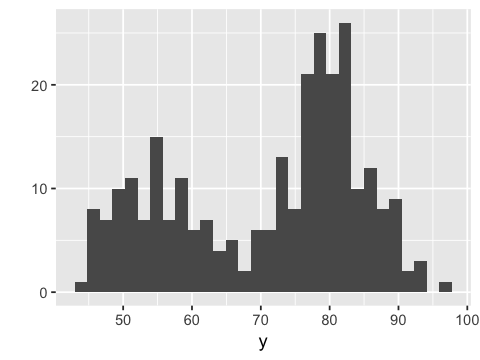

In [9]:
qplot(y, bins=30)

Ну дела! Распределение времени для гейзера оказывается бимодальным. Википедия подсказывает, что так происходит из-за того, что вода входит в гейзер на нескольких различных уровнях. Получается, что время, которые мы получаем на выходе это результат смеси двух распределений (вспомните как вы генерировали смесь в первой домашке, тут за вас это сделала природа). 

Задача разделения смесей — это классическая задача обучения без учителя из машинного обучения. И уже сейчас мы с вами можем попытаться её решить. Без учителя она, потому что мы не знаем какое извержение было из какого распределения и лишь можем догадываться об этом, исходя из полученных данных.

Давайте предположим, что с вероятностью $p$ данные приходят из нормального распределения со средним $\mu_1$ и дисперсией $\sigma_1^2$ и с вероятностью $1-p$ из нормального распределения со средним $\mu_2$ и дисперсией $\sigma_2^2$. В таком случае плотность распределения случайной величины будет выглядеть как: 

$$
f(x) = p \cdot \frac{1}{\sqrt{2 \pi} \sigma_1} e^{- \frac{(x - \mu_1)^2}{2 \sigma_1^2}} + (1 - p) \cdot \frac{1}{\sqrt{2 \pi} \sigma_2} e^{- \frac{(x-\mu_2)^2}{2 \sigma_2^2}}
$$

Нам необходимо оценить пять параметров. 

__[б]__ Вбейте логорифмическую функцию правдоподобия.

In [28]:
mixt_lnL <- function(theta,y) {
  pi1    <- theta[1]
  mu1    <- theta[2]
  mu2    <- theta[3]
  sigma1 <- theta[4]
  sigma2 <- theta[5]
  pdf <- pi1*dnorm(y, mu1, sigma1) + (1 - pi1)*dnorm(y, mu2, sigma2)
  deviance <- 2*sum(log(pdf))
 return(deviance)
}

К сожалению, для такой функции правдоподобия не существует глобального максимума. Почему, можно попытаться понять самому, либо прочитать в [книжке Лагутина](https://yadi.sk/i/UuWhEn_L4X_Rwg) на странице 117 в примере 8. Тем не менее, при большом числе наблюдений, почти наверное, есть локальный максимум, дающий хорошие оценки. Про это тоже есть на странице 117. 

Пакет `maxLik` почему-то начинает тупить на этом примере. Поэтому, давайте ради разнообразия воспользуемся другой функцией для оптимизации, встроенной в R. Она носит гордое имя `nlm` и умеет только минимизировать. Давайте домножим наше правдоподобие на минус один. 

In [29]:
psevdo_lnL <- function(theta,y){
    return(-1*mixt_lnL(theta, y))
}

Теперь проведём процедуру оптимизации. Параметр `hessian = TRUE` отвечает за то, что на выходе посчитается гессиан. Когда вы запустите код ниже, на выходе вы получите кучу красного текста и неадекватные оценки на параметры. 

In [ ]:
result <- nlm(mixt_lnL, c(0.5, 1, 1, 1, 1), y, hessian=TRUE)
result

Это происходит из-за того, что мы плохо подобрали стартовые точки и не смогли пробиться в нужный нам локальный оптимум. Давайте попробуем подобрать стартовые точки на основе нашей интуиции более грамотно. Посмотрим на гистограмму, которую мы построили выше. Там где-то треть лежит в левом куполе. Берём эту цифру как стартовую для $p$. 

__[в]__ Для двух средних и дисперсий нам тоже нужны приближения. Придумайте как найти их и найдите. 

In [41]:
# наши квантиль 1/3 и вытащили  всё, что левее
mean(y[y < quantile(y, 0.33)])
sd(y[y < quantile(y, 0.33)])

# по аналогии с тем, что правее 
mean(y[y > quantile(y, 0.33)])
sd(y[y > quantile(y, 0.33)])

[1] 53.61111

[1] 5.042949

[1] 79.44505

[1] 6.49392

Теперь нужно провести оптимизацию. Подставьте в вектор `c( )` свои приближения. Если вы их подобрали удачно, процедура оптимизации сойдётся куда нужно. 

In [54]:
result <- nlm(psevdo_lnL, c(.33, 54, 79, 5, 6), y, hessian=TRUE)

Warning message in log(pdf):
“созданы NaN”Warning message in nlm(psevdo_lnL, c(0.33, 54, 79, 5, 6), y, hessian = TRUE):
“NA/Inf заменены максимальным положительным значением”Warning message in log(pdf):
“созданы NaN”Warning message in nlm(psevdo_lnL, c(0.33, 54, 79, 5, 6), y, hessian = TRUE):
“NA/Inf заменены максимальным положительным значением”

In [65]:
# Почти угадали оценки на глазок! А всё потому что метод максимального 
# правдоподобия говорит: че видишь, то и есть на самом деле! 
result$estimate

[1]  0.3608848 54.6148097 80.0910184  5.8711938  5.8677493

__[г]__ Ура! Мы оценили параметры. Теперь давайте найдём их ковариационную матрицу. Наши оценки будут иметь асимптотически нормальное многомерное распределение. Вы же ещё не успели забыть, как искать её через матрицу Гессе? 

In [66]:
var_hat = solve(-1*result$hessian)
var_hat

-0.0004857386,-0.002039009,-0.001304941,-0.001722607,0.001310785
-0.0020390086,-0.244843460,-0.042118522,-0.060932784,0.041032009
-0.0013049410,-0.042118522,-0.127237761,-0.034269173,0.028980374
-0.0017226067,-0.060932784,-0.034269173,-0.144492845,0.031886764
0.0013107846,0.041032009,0.028980374,0.031886764,-0.080382412


__[д]__ Интересно, насколько сильно различается среднее время извержения гейзера в разных состояниях. Постройте доверительный интервал для разности $\mu_2 - \mu_1$. 

__[е]__ Постройте на одно картинке гистограмму и оценённую теоретическую плотность распределения времени извержений.  

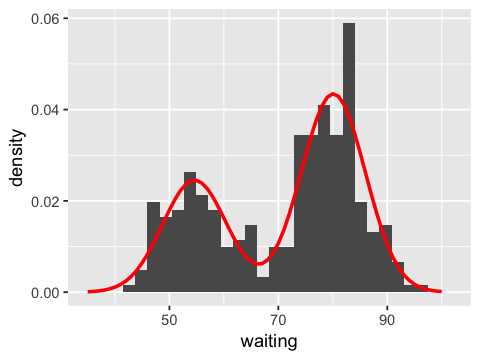

In [70]:
dmixt <- function(x,theta) {
  p <- theta[1]
  mu1 <- theta[2]
  mu2 <- theta[3]
  sigma1 <- theta[4]
  sigma2 <- theta[5]
  f1 <- dnorm(x, mu1, sigma1)
  f2 <- dnorm(x, mu2, sigma2)
  f <- p*f1 + (1-p)*f2
}

x <- (35:100)
pdf <- dmixt(x, result$estimate)

ggplot(data=faithful) + 
    geom_histogram(aes(x=waiting, y=..density..), bins=30) +
    geom_line(data=data.frame(x, pdf), aes(x, pdf), colour="red", size=1)

__[ж]__ Гейзер может работать в двух режимах. Судя по полученным оценкам, оба режима по своему разбросу, в плане времени, оаботают одинаково. Проверьте с помощью теста отношения правдоподобий, гипотезу, что $\sigma_1 = \sigma_2$ против двухсторонней альтернативы. Что означает результат, поулученный при проверке для любителей гейзеров? 

__Мораль:__  «Жизнь как коробка шоколадных конфет: никогда не знаешь, какая начинка тебе попадётся». Когда оцениваете модели, всегда держите в голове то, что это делается численными методами. Для хорошей сходимости, для алгоритма не помешает хорошая инициализация. Когда вы дальше будете смотреть на машинное обучение и нейросетки, инициализация весов перед обучением будет занимать там одно из важнейших мест. 

Кстати говоря, довольно часто задачи, где выскакивают очень сложные функции правдоподобия, решают с помощью EM— алгоритма. Но мы про него не будем говорить в нашем коротеньком курсе, хотя и могли бы. Но мы можем поговорить о нём на каком-нибудь ещё факультативе :) 

Подробнее про задачу разделения смесей, EM и кластеризацию в R можно посмотреть [тут.](http://sia.webpopix.org/mixtureModels.html) Написано не очень понятно, но впечатляет. 

-----------------

### [20] Задачка 9 (Стрижка лайков) 

В группе [мемы про машинное обучение для ~~взрослых мужиков~~ юных леди](https://vk.com/weirdreparametrizationtrick) постят мемы про машинное обучение. Юные леди смотрят мемы про машинное обучение, лайкают их, комментируют и репостят. В итоге рождается [табличка со статистикой.](https://yadi.sk/i/D9prr_lu3VRywS) 

In [142]:
df = read.csv('/Users/fulyankin/Yandex.Disk.localized/R/R_prob_data//memes_likes.csv', sep=';') 
nrow(df)
head(df)

[1] 197

X,Date,likes,comments,views,reposts
0,2018-05-04 20:23:54,6,4,185,0
1,2018-05-02 01:20:28,13,9,309,0
2,2018-04-29 16:48:14,0,0,147,0
3,2018-04-22 17:03:31,3,0,326,0
4,2018-04-16 14:47:33,4,0,417,0
5,2018-04-12 17:37:35,9,0,504,1


Нам предстоит очень серьёзно поработать с этой табличкой. 

__[a]__ Постройте для числа лайков, числа комментов, числа репостов и числа просмотров гистограммы. Как вы думаете, какие именно распределения выплюнули из сундука на нас эти выборки? 

Гипотезы о распределениях мы проверять пока не умеем, поэтому сразу же идём дальше.

__[б]__ Окей. У нас есть $4$ разных случайных величины. Давайте попробуем сконструировать фабрику по производству моделей. Мы попробуем предположить для каждой случайной величины по очереди три вещи: 

* Что она пришла к нам из распределения Пуассона с некоторым параметром $\lambda$ 
* Что она пришла к нам из геометрического распределения с параметром $p$
* Что она пришла к нам из нормального распределения с параметрами $\mu$ и $\sigma^2$

Давайте для всех трёх ситуаций вобьём логарифмические функции правдоподобия.

In [ ]:
# первая функция правдоподобия

In [ ]:
# вторая функция правдоподобия

In [ ]:
# третья функция правдоподобия 

__[в]__ Предположим, что мы исследуем лайки. Мы пытаемся сначала описать их нормальным распределением, потом распределением Пуассона, потом геометрическим. Таким образом, мы получаем для лайков три модели. Возникает вопрос: какая из моделей лучше всего описывает выборку? Как выбрать конкретную? 

Для ответа на этот вопрос нужно вспомнить что такое правдоподобие. Правдоподобие — это вероятность того, что мы получим именно нашу выборку при фиксированных параметрах. Значит, мы должны для каждой из трёх моделей посчитать значение правдоподобия в точке оптимума. Где оно больше, там больше вероятность рождения именно нашей выборки. Ту модель и выбираем. 

Давайте возьмём лайки и оценим для них все три модели. Пакет `maxLik` выводит в протоколе значение логарифма правдоподобия в точке оптимума. Вытащите это значение из всех трёх моделей и возьмите от него экспоненту. Это вероятность получить нашу выборку. Для какой модели правдоподобие оказалось самым большим? 

__[г]__ У схемы, которую мы описали в предыдущем пункте, есть проблема. Она заключается в том, что в нормальном распределении я оцениваю два параметра, в распределении Пуассона и геометрическом, один параметр. Чем больше параметров я оцениваю, тем больше у меня свободы и тем выше правдоподобие. Чтобы корректно сравнивать между собой эти две модели, нужно ввести какой-то штраф на число переменных. 

Например, можно сделать это вот так ($k$ - число параметров): 

$$
AIC = 2 \cdot k - 2 \cdot \ln L
$$

Тогда чем меньше величина $AIC$, тем лучше модель. Такой способ введения штрафа называют [информационным критерием Акаике.](https://ru.wikipedia.org/wiki/Информационный_критерий_Акаике) Можно ввести штраф более извращённым способом. Например, вот так: 

$$
SC = k \cdot \ln n - 2 \cdot \ln L.
$$

Такой способ штрафа более жёсткий. Он включает в себя не только число оцениваемых параметров $k$, но и число наблюдений $n$. Его называют [критерием Шварца.](http://www.machinelearning.ru/wiki/index.php?title=BIC) Иногда говорят, что это байесовский информационный критерий, потому что его можно вывести с помощью формулы Байеса. 

На эконометрике вы будете более пристально смотреть на эти критерии. Почему-то люди не понимают, что это просто оштрафованное правдоподобие. Поэтому я решил познакомить вас с ними уже сейчас. 

Возьмите все три модели для лайков и найдите для них значение критерия Акаике. Сделать это можно командой `AIC(result)`. Какая модель оказывается лучшей? Согласуется ли это с тем, что вы решили в пункте __[а],__ посмотрев на гистограмму? 

__[д]__ Оцените все три модели для репостов. Какая оказывается лучшей? Скорее всего, это оказалось геометрическое распределение. Проинтерпретируйте параметр $p$ для него. 

__[е]__ Оцените все три модели для просмотров. Какая оказалась лучшей? Согласуется ли это с вашими ощущениями из пункта __[а]?__

__[ж]__ Проделайте эту процедуру в последний раз, для комментариев. 

Повышаем планочку. Давайте посмотрим на гистограмму для числа комментариев. В нуле у них довольно большой пик, который выбивается из распределения Пуасона. 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


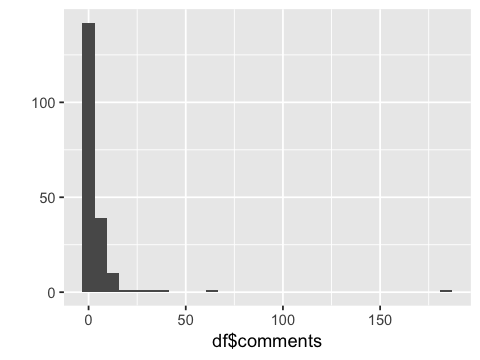

In [149]:
qplot(df$comments)

Такой пик в нуле выскакивает довольно часто. Даже специальную модель для борьбы с ним придумали. Она называется [zero inflated model.](https://en.wikipedia.org/wiki/Zero-inflated_model)  Давайте попробуем её на вкус. Правда сначала её надо построить. 

__Делай раз:__  мы хотим, чтобы распределение Пуассона для нас работало, начиная с $X = 1$. В таком случае нам его надо сдвинуть вправо так, чтобы сумма вероятностей по-прежнему оставалась равна единице. Мы знаем, что 

$$
\sum_{k=0}^{\infty} P(X = k) = \sum_{k=0}^{\infty} \frac{\lambda^k e^{-\lambda}}{k!} = e^{-\lambda} + \sum_{k=1}^{\infty} \frac{\lambda^k e^{-\lambda}}{k!} = 1.
$$

Если мы решим оставить только сумму, начиная с единицы, получится, что 

$$
\sum_{k=1}^{\infty} \frac{\lambda^k e^{-\lambda}}{k!} = 1 - e^{-\lambda}.
$$

Чтобы перед нами было полноценное распределение и все вероятности в сумме давали $1$, нам надо поделить сумму слева на $1 - e^{-\lambda}$. Получается, что для распределения Пуассона, обрезанного со стороны нуля, формула для поиска вероятности выглядить как 

$$
P(X = k) = \frac{1}{1 - e^{-\lambda}} \cdot \frac{\lambda^k e^{-\lambda}}{k!}.
$$

Можно получить эту формулу исходя не из интуции, а из формулы условной вероятности:

$$
P(X = k \mid X > 0) = \frac{P(X = k \cap X > 0)}{P(X > 0)} = \frac{\frac{\lambda^k e^{-\lambda}}{k!}}{1 - e^{-\lambda}}
$$


__Делай два:__ Теперь давайте построим смесь из двух распределений. Случайная величина $X$ будет принимать с вероятностью $p$ значение $0$, и с вероятностью $1 - p$ будет распределена по Пуассону со сдвигом: 

$$
\begin{aligned}
& P(X = 0) = p \\
& P(X = k) = (1 - p) \cdot \frac{1}{1 - e^{-\lambda}} \cdot \frac{\lambda^k e^{-\lambda}}{k!}.
\end{aligned}
$$

Построенная модель — это ещё не совсем zero inflated model. У неё есть кое-какой минус. 

__[з]__ Выведите для такой модели функцию правдоподобия. Искать её максимум придётся по двум параметрам: $\lambda$ и $p$. Вбейте её и найдите оценки.

__[и]__ Посчитайте для оценённой модели критерий Акаике и сравните её с лучшей из предыдущих, построенных для комментариев, трёх моделей.

У такой формулировки модели есть минус. Невозможно проверить гипотезу о том, что в пике нет никаких особенностей. Если $p = 0$, то у нас просто-напросто не бывает нулевых значений. Хочется, чтобы у нас была возможность протестировать такую гипотезу. Для этого ноль выносится в отдельную категорию не в результате обрезания распределения Пуассона, а немного иначе.  Давайте домножим $P(X = k)$ на $(1-p)$, а потом просто вынесем $(1 - p) \cdot P(X = 0)$ в отдельное слагаемое. И тогда получится моделька: 

$$
\begin{aligned}
& P(X = 0) = p + (1 - p) \cdot e^{-\lambda} \\
& P(X = k) = (1 - p) \cdot \frac{\lambda^k e^{-\lambda}}{k!}.
\end{aligned}
$$

Что мы видим здесь? Если $p=0$, то у нас получается распределение Пуассона. У нас возникает возможность проверить гипотезу $H_0$, состояшую в том, что в нуле действительно есть особенности. 

__[к]__ В пункте __[з]__ параметр $p$ можно было проинтерпретировать, как вероятность возникновения нуля. Как он будет интерпретироваться в такой модели? 

__Ответ:__

__[л]__ Вбейте функцию правдоподобия для zero inflated model. Оцените значения параметров. Правда ли, что по AIC эта модель никак не отличается от обрезанного Пуассона? 

__[м]__ Последний пункт! Нам осталось проверить гипотезу о том, что $p = 0$ в нашей zero inflated model. Сделаем это с помощью теста отношения правдоподобий на уровне значимости $5\%$. Если гипотеза о том, что $p = 0$ не отвергается, значит усложнять модель нет никакого смысла, так как поведение случайной величины в нуле ничем не отличается от Пуассоновского. 

__Мораль:__ Во-первых, можно брать какие-то уже знакомые вам модели и дорабатывать их до новых. Метод максимального правдоподобия позволяет проверить гипотезу о том, что доработки имели смысл. Не забывайте о том, что чем больше параметров вы оцениваете, тем более сложной получается модель, и тем лучше она описывает данные. Ситуация, когда мы берём слишком подробную модель для маленького объёма данных, и вылизываем их, называется __переобучением.__ Это очень большая головная боль, с которой вы в будущем будете бороться, как с самой большой чумой 21 века. 

Во-вторых, можно оценивать много моделей, а после сравнивать их между собой. Для этого можно использовать не только правдоподобие и информационные критерии, но и разные другие метрики. Но об этом тоже позже. 

### [10] Задачка 10 (Кролики) 

Впервые европейцы появились на берегах Австралии в $1606$ году. Голландцы под руководством Виллема Янсзона сошли на её прекрасные берега. Приплыли они в пустыню. Поэтому сразу же взошли на борт и свалили.  В $1788$ году к Австралии пришвартовались несколько Британских кораблей. Пришвартовались они с правильной стороны материка. Это позволило основать в Австралии колонию для осуждённых, которая впоследствии превратилась в Сидней. С тех пор Австралия использовалась англичанами как тюрьма. 

Со временем на материке появились и другие, никак не связанные с преступниками колонии. В $1901$ году Австралийские колонии создали свою собственную федерацию. На $2014$ год население Австралии составляет $23$ млн. человек (население Москвы - около $15$ млн.). 

В $1858$ году колонисты привезли в Австралию $24$ кролика. Год спустя этих длинноухих зверьков  можно было увидеть за $100$ километров от места высадки — и на север, и на запад. А через $3-4$ года число кроликов  возросло до $750$ миллионов. И начался хаос.

Кролики на пастбищах начали соперничать с овцами и коровами. Десять кроликов съедали столько травы, сколько съедала одна овца. Только вот от овцы можно получить мяса в три раза больше. Фермеры уже подсчитывали свои убытки и объявили кроликам настоящую войну. Более того, кролики начали вытеснять из привычных зон обитания местные уникальные виды. К борьбе с кроликами подключились и ученые.

Сама борьба с кроликами принесла немало бед для Австралийской флоры и фауны. Первоначально решили завезти естественных врагов кроликов – лисиц, хорьков, кошек, горностаев, ласок. Но попытка не увенчалась успехом. Привезенные виды также стали активно размножаться. Вместо того, чтобы охотиться на быстрых кроликов, они стали поедать местных сумчатых животных и птиц, которые были не так быстры и не могли сопротивляться новым хищникам.

Тогда обратились к традиционным методам – ядохимикаты, отстрел, взрывание нор. Это было не эффективно, учитывая огромную численность животных. В штате Западная Австралия в период с $1901$ по $1907$ гг. построили огромный проволочный забор. Он так и называется – «Забор от кроликов №1». Забор постоянно патрулируется на машинах, кроличьи подкопы засыпаются, кролики отстреливаются. 

Сначала забор патрулировали на верблюдах, привезённых из Африки (ничему жизнь не учит австралийских колонистов). После появления автомашин, верблюдов за ненадобностью выпустили на волю, они расплодились, стали уничтожать пастбища, и в Австралии появилась новая проблема.

В середине $50$-х гг. $20$ века для борьбы с кроликами стали использовать достижения медицины. В Австралию привезли кроличьих блох и комаров, зараженных вирусом миксоматоза. Это заболевание вызывает опухоли и смерть кроликов. Таким образом было уничтожено около $90\%$ заболевших животных. Но оставшиеся кролики выработали иммунитет, с течением времени стали реже заболевать и ещё реже умирать. Так что на данный момент проблема кроликов в Австралии до сих пор не решена.

* [Серия Симпсонов, где вместо кроликов — лягушки.  Но мы то понимаем...](http://www.simp-fan.ru/episode/616/)
* [О кроликах и Австралии на википедии.](https://ru.wikipedia.org/wiki/Кролики_в_Австралии)

<img src="https://upload.wikimedia.org/wikipedia/commons/4/49/Rabbits_MyxomatosisTrial_WardangIsland_1938.jpg" width="600"> 

В этой задачке мы попробуем немного поработать с результатами исследований $1956$ года. В нём [Феннер и его коллеги](https://www.cambridge.org/core/services/aop-cambridge-core/content/view/8B829D0C0E0BFBBE4C6279BD3B272EA7/S002217240004451Xa.pdf/further_studies_on_the_mechanism_of_mosquito_transmission_of_myxomatosis_in_the_european_rabbit.pdf) изучали разные вирусы, из-за которых умирают кролики. Табличка с собранными данными есть внутри R, в пакете `emdbook`. Установим пакет и подгрузим данные. 

In [89]:
#install.packages('emdbook')
library('emdbook')

# подгрузили данные 
data(MyxoTiter_sum)
df = MyxoTiter_sum  #переименовал для удобства 

# глянули на них 
head(df)

grade,day,titer
1,2,5.207
1,2,5.734
1,2,6.613
1,3,5.997
1,3,6.612
1,3,6.810


В колонке `grade` находится штамм вируса titr. Всего их в исследовании $5$ разновидностей. Пока что мы сосредоточимся на первом. В колонке `titer` находится показатель концентрации вируса в коже кролика. Измерение делалось в разные дни после заражения. Мы будем игнорировать этот факт и притворимся, что все измерения пришли к нам из одного распределения, которое не зависит от времени. То есть, мы предположим, что выборка независима и одинакого распределена (на самом деле это неправда и чуть позже мы откажемся от такого подхода).

Сконцентрируем внимание на первом штамме вируса.

In [92]:
df = df[df['grade'] == 1, ]

Будем препдполагать, что данные о концентрации вируса пришли к нам из [гамма-распределения.](https://en.wikipedia.org/wiki/Gamma_distribution) Из того самого распределения из ваших контрольных! Почему именно оно? Концентрация принимает положительные значения в рамках какого-то фиксированного промежутка, а дальше начинается хвост распределения. Надо только понять где этот промежуток и насколько резко он обрывается. Параметры гамма-распределения помогают сделать это. 

__[а]__ Посмотрите на плотность гамма-распределения на Википедии. Попытайтесь проинтерпретировать за что отвечают его параметры. 

Экспоненциальное распределение, кстати говоря частный случай гамма-распределения. Давайте в этом убедимся.Выпишите плотность гамма-распределения. 

* при каких значениях параметров оно совпадает с экспоненциальным?
* при каких значениях параметров оно совпадает с хи-квадрат распределением?

__Ответ:__ 

__[б]__ Методом максимального правдоподобия оцените параметры гамма-распределения. Если есть проблемы с вбиванием функции правдоподобия, воспользуйтесь приёмом с `dgamma` из лекции (мы так хитрили при авариях на шахтах с Пуассоном). 

In [93]:
gammaNLL1 = function(th, X){
  return(sum(log(dgamma(X, shape = th[1], scale = th[2]))))
}

In [94]:
res <- maxLik(gammaNLL1,  start = c(45.8, 0.151), X = df$titer)
res

Maximum Likelihood estimation
Newton-Raphson maximisation, 7 iterations
Return code 2: successive function values within tolerance limit
Log-Likelihood: -37.66714 (2 free parameter(s))
Estimate(s): 49.61192 0.1395647 

__[в]__ На одном графике постройте гистограмму и оценённую в ходе метода максимального правдоподобия плотность распределения.

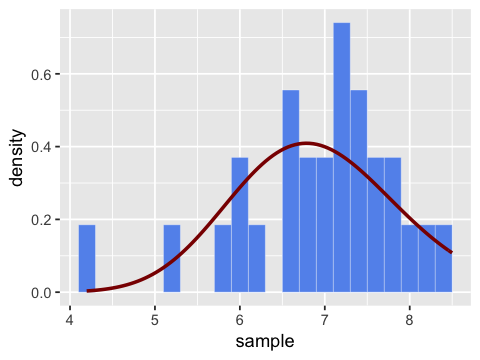

In [95]:
f <- dgamma
fun_args <- list(shape =  49.6119, scale= 0.1395647)
sample = df$titer

binwidth = 0.2 # ширина бинов
ggplot(df, aes(x = sample, binwidth = binwidth))+
# Наносим гистограмму 
geom_histogram(aes(y=..density..), binwidth = binwidth, colour = "white", 
                                   fill = "cornflowerblue", size = 0.1)+
                                # цвет линий разделителей, заливка, толщина линий разделителей
# Наносим плотность распределения
stat_function(fun = f, args = fun_args, color = "darkred", size = 1)

Пришло время отказаться от предпосылки, что наши наблюдения по кроликам не зависят от времени. Это гнусная ложь. Усложняем модель!  Концентрация вируса изменяется в зависимости от количества дней, прошедших после заражения.

__[г]__ О, мой любитель графиков! Построй картинку, на которой будет видна зависимость концентрации вируса от времени (`qplot` поможет). Какой характер носит эта зависимость? 

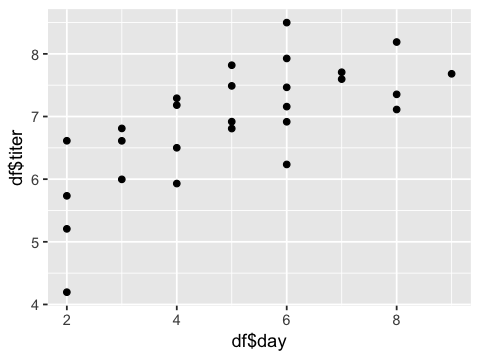

In [96]:
qplot(df$day, df$titer)

Попробуем побаловаться с моделями времени жизни. Так можно замоделировать динамику различных популяций, [объём дневных осадков](http://journals.tubitak.gov.tr/engineering/issues/muh-00-24-6/muh-24-6-7-9909-13.pdf). А ещё [экономический рост.](https://www.bcu.gub.uy/Comunicaciones/Jornadas%20de%20Economa/CAYSSIALS_GASTON_2017_4770.pdf) Простейшим примером модели времени жизни является [модель Рикера.](https://en.wikipedia.org/wiki/Ricker_model) Давайте попробуем использовать её, чтобы промодлировать зависимость концентрации вируса в кроликах от времени. 

\begin{equation*} 
\begin{aligned}
& m = a \cdot t \cdot e^{-b \cdot t} \\
& X \sim Gamma(shape = s, scale = m) \\ 
\end{aligned}
\end{equation*}

Будем снова использовать гамма-распределение, чтобы описывать концентрацию вируса $X$ в момент $t$. Параметр `scale` отвечает за интенсивность вируса в кролике. Мы хотим, чтобы он зависил от времени. Пусть вирусв крови кролика копится экспоненциально, то есть ведёт себя как функция $f(t) = a \cdot t \cdot e^{-b \cdot t}$.

__[д]__ Методом максимального правдоподобия оцените параметры $a, b$ и $s$.  

In [128]:
gammaNLL2 = function(th, X){
  m = th[2]*X$day * exp(-th[3] * X$day)
  return(sum(log(dgamma(X$titer, shape = th[1], scale = m))))
}

In [131]:
res <- maxLik(gammaNLL2,  start = c(20, 6, 0.2), X = df)
res

Warning message in dgamma(X$titer, shape = th[1], scale = m):
“созданы NaN”Warning message in dgamma(X$titer, shape = th[1], scale = m):
“созданы NaN”Warning message in dgamma(X$titer, shape = th[1], scale = m):
“созданы NaN”Warning message in dgamma(X$titer, shape = th[1], scale = m):
“созданы NaN”Warning message in dgamma(X$titer, shape = th[1], scale = m):
“созданы NaN”Warning message in dgamma(X$titer, shape = th[1], scale = m):
“созданы NaN”Warning message in dgamma(X$titer, shape = th[1], scale = m):
“созданы NaN”Warning message in dgamma(X$titer, shape = th[1], scale = m):
“созданы NaN”Warning message in dgamma(X$titer, shape = th[1], scale = m):
“созданы NaN”Warning message in dgamma(X$titer, shape = th[1], scale = m):
“созданы NaN”Warning message in dgamma(X$titer, shape = th[1], scale = m):
“созданы NaN”Warning message in dgamma(X$titer, shape = th[1], scale = m):
“созданы NaN”Warning message in dgamma(X$titer, shape = th[1], scale = m):
“созданы NaN”Warning message in dgamma

Maximum Likelihood estimation
Newton-Raphson maximisation, 34 iterations
Return code 2: successive function values within tolerance limit
Log-Likelihood: -29.50914 (3 free parameter(s))
Estimate(s): 90.49696 0.03935213 0.1713292 

__Мораль:__ Зайку жалко :( 

---------------------------